In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from thepackage import add, multiply, rms, signal
from pathlib import Path

In [2]:
# from thepackage import rms
# rms([1,2,3])


2.160246899469287

5.8 Noise

In [2]:
# data = np.load('3.0e6_250kHz.npz')
# test_data = data['data']

In [116]:


# # npzfile1 = np.load(data\"a2.8e6_noise.npz")
# # npzfile2 = np.load("a1.0e6_noise.npz")
# # npzfile3 = np.load("a1.2e6_noise.npz")
# # npzfile4 = np.load("a1.4e6_noise.npz")
# # npzfile5 = np.load("a1.6e6_noise.npz")
# # npzfile6 = np.load("a1.8e6_noise.npz")
# test_data = np.load(data_path)
# # print(npzfile['data'])
# #test_data = npzfile1['data']+npzfile2['data']+npzfile3['data']+npzfile4['data']+npzfile5['data']+npzfile6['data']
# test_data = npzfile3['data']
# #amount = len(test_data)
# mu = np.mean(test_data)
# var = np.var(test_data)
# sigma = np.std(test_data)
# print("mean = ",mu," variance = ", var, "standard deviation = ", sigma)

# #mu, std = norm.fit(test_data)
# #x = np.linspace(min(test_data), max(test_data), 2048)
# #p = norm.pdf(test_data, mu, std)
# #gaussian = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# plt.hist(test_data, bins = 50)
# #plt.plot(x, p, 'k', linewidth=2)
# #plt.plot(x, gaussian, 'r--', linewidth=2, label="Gaussian (σ = RMS)")
# plt.axvline(x=mu, color='r', linestyle='--')
# plt.xlabel("voltage")
# plt.ylabel("counts")
# plt.title("noise samples")
# plt.show()

In [117]:
# signal(np.arange(len(test_data)), test_data)
# plt.xlim(500,600)


In [118]:
#5.8 start
data_sets = {
    1.0e6: [Path("a1.0e6_noise.npz")],
    1.2e6: [Path("a1.2e6_noise.npz")],
    1.4e6: [Path("a1.4e6_noise.npz")],
    1.6e6: [Path("a1.6e6_noise.npz")],
    1.8e6: [Path("a1.8e6_noise.npz")],
    2.0e6: [Path("a2.0e6_noise.npz")],
    2.2e6: [Path("a2.2e6_noise.npz")],
    2.4e6: [Path("a2.4e6_noise.npz")],
    2.6e6: [Path("a2.6e6_noise.npz")],
    2.8e6: [Path("a2.8e6_noise.npz")],
    3.0e6: [Path("a3.0e6_noise.npz")],
}

def load_block(npz_path, key="data"):
    with np.load(npz_path) as f:
        x = f[key].astype(float)
    return x

In [119]:
def block_stats(x):
    mu = np.mean(x)
    var = np.var(x)
    sigma = np.std(x)
    rms = np.sqrt(np.mean(x**2))  # RMS voltage
    return mu, var, sigma, rms

for fs, files in data_sets.items():
    print(f"\n=== fs = {fs/1e6:.2f} MHz ===")
    for p in files[:3]:  # print first 3 as examples
        x = load_block(p)
        mu, var, sigma, rms = block_stats(x)
        print(p.name, f"mean={mu:.3g}, var={var:.3g}, std={sigma:.3g}, rms={rms:.3g}, N={len(x)}")



=== fs = 1.00 MHz ===
a1.0e6_noise.npz mean=-6.75, var=4.11e+03, std=64.1, rms=64.4, N=2048

=== fs = 1.20 MHz ===
a1.2e6_noise.npz mean=-7.95, var=3.99e+03, std=63.1, rms=63.6, N=2048

=== fs = 1.40 MHz ===
a1.4e6_noise.npz mean=-7.9, var=3.87e+03, std=62.2, rms=62.7, N=2048

=== fs = 1.60 MHz ===
a1.6e6_noise.npz mean=-4.36, var=4.07e+03, std=63.8, rms=63.9, N=2048

=== fs = 1.80 MHz ===
a1.8e6_noise.npz mean=-7.04, var=4.15e+03, std=64.5, rms=64.8, N=2048

=== fs = 2.00 MHz ===
a2.0e6_noise.npz mean=-8.22, var=3.93e+03, std=62.7, rms=63.2, N=2048

=== fs = 2.20 MHz ===
a2.2e6_noise.npz mean=-7.7, var=3.56e+03, std=59.6, rms=60.1, N=2048

=== fs = 2.40 MHz ===
a2.4e6_noise.npz mean=-7.77, var=3.8e+03, std=61.7, rms=62.2, N=2048

=== fs = 2.60 MHz ===
a2.6e6_noise.npz mean=-7.09, var=3.7e+03, std=60.9, rms=61.3, N=2048

=== fs = 2.80 MHz ===
a2.8e6_noise.npz mean=-3.59, var=4.19e+03, std=64.7, rms=64.8, N=2048

=== fs = 3.00 MHz ===
a3.0e6_noise.npz mean=-3.09, var=3.65e+03, std=60.4

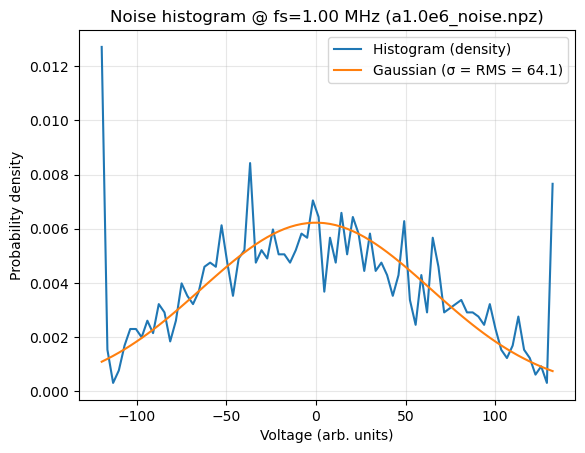

In [120]:
def plot_hist_with_gaussian(x, title="", bins=80, remove_mean=True):
    x_use = x - np.mean(x) if remove_mean else x

    rms = np.sqrt(np.mean(x_use**2))  # width requested
    mu = 0.0 if remove_mean else np.mean(x_use)

    counts, edges = np.histogram(x_use, bins=bins, density=True)
    centers = 0.5*(edges[:-1] + edges[1:])

    pdf = norm.pdf(centers, loc=mu, scale=rms)

    plt.figure()
    plt.plot(centers, counts, label="Histogram (density)")
    plt.plot(centers, pdf, label=f"Gaussian (σ = RMS = {rms:.3g})")
    plt.xlabel("Voltage (arb. units)")
    plt.ylabel("Probability density")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Example: pick one fs and one file
fs0 = list(data_sets.keys())[0]
p0 = data_sets[fs0][0]
x0 = load_block(p0)

plot_hist_with_gaussian(x0, title=f"Noise histogram @ fs={fs0/1e6:.2f} MHz ({p0.name})")


Fig.5.8.1 Noise histogram at a sampling rate of 1.0 Mhz with theoretical Gaussian with width equal to the rms voltage of 64.1.
The voltage histogram is approximately Gaussian and centered near zero, consistent with receiver noise arising from the sum of many independent microscopic processes (Central Limit Theorem). The overlaid Gaussian distribution with width equal to the measured RMS voltage provides a good fit to the data. Small deviations at the tails are attributed to finite sample size, ADC quantization, and non-idealities in the analog signal chain.

In [50]:
def power_spectrum(x, fs, remove_mean=True, window="hann"):
    x = x - np.mean(x) if remove_mean else x
    N = len(x)

    if window == "hann":
        w = np.hanning(N)
    elif window is None:
        w = np.ones(N)
    else:
        raise ValueError("window must be 'hann' or None")

    xw = x * w

    X = np.fft.fft(xw)
    f = np.fft.fftfreq(N, d=1/fs)

    # raw power (arb units); window normalization omitted for simplicity
    P = np.abs(X)**2

    # shift for plotting
    f = np.fft.fftshift(f)
    P = np.fft.fftshift(P)
    return f, P

def average_spectrum(files, fs):
    Ps = []
    f_ref = None
    for p in files:
        x = load_block(p)
        f, P = power_spectrum(x, fs)
        if f_ref is None:
            f_ref = f
        Ps.append(P)
    Pavg = np.mean(Ps, axis=0)
    return f_ref, np.array(Ps), Pavg

# Example for one sampling rate:
# fs = fs0
# files = data_sets[fs]
# f, Pall, Pavg = average_spectrum(files, fs)


# mask = f >= 0
# plt.figure()
# plt.semilogy(f[mask], Pavg[mask])
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Power (arb.)")
# plt.title(f"Average power spectrum over {len(files)} blocks (fs={fs/1e6:.2f} MHz)")
# plt.grid(True, which="both", alpha=0.3)
# plt.show()


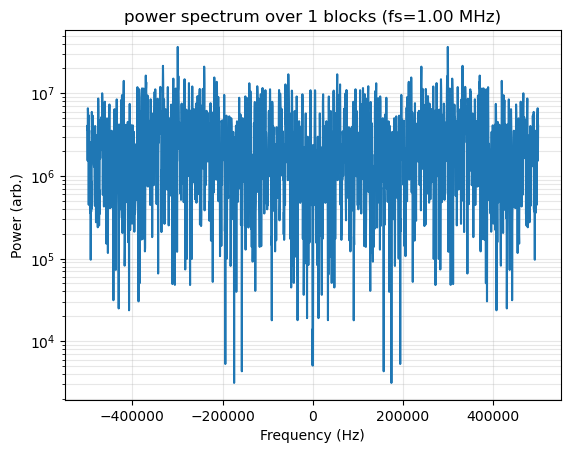

In [49]:
x = load_block("a1.0e6_noise.npz")
f, P = power_spectrum(x, fs)
plt.figure()
plt.semilogy(f,P)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (arb.)")
plt.title(f"power spectrum over 1 blocks (fs={fs/1e6:.2f} MHz)")
plt.grid(True, which="both", alpha=0.3)
plt.show()

Fig.5.8.2 The power spectrum for a single block of the multiple data blocks collected, example shown in graph is collected at sampling rate of 1.0 MHz.

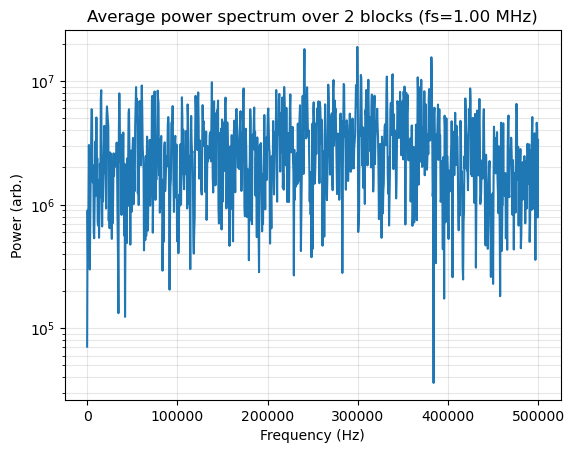

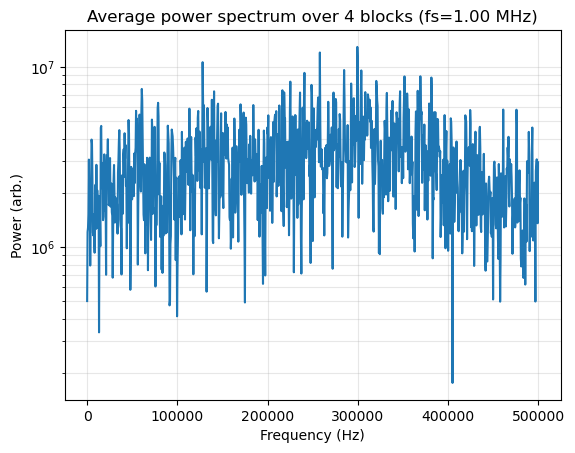

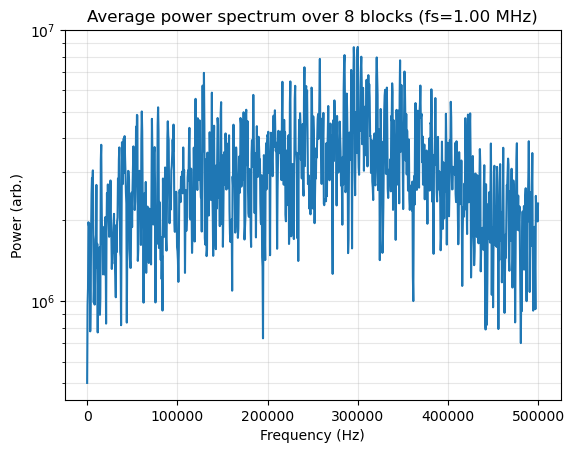

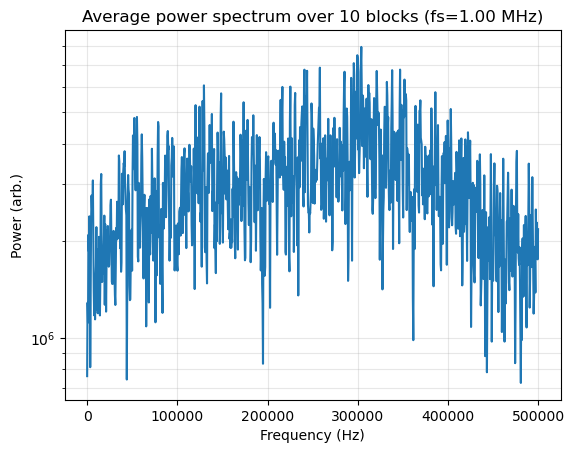

In [66]:
def average_spectrum_plot(N):
    files = []
    for i in np.arange(N):
        fs = list(data_sets.keys())[i]
        files = files+data_sets[fs]
    
    f, Pall, Pavg = average_spectrum(files, 1e6)


    mask = f >= 0
    plt.figure()
    plt.semilogy(f[mask], Pavg[mask])
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power (arb.)")
    plt.title(f"Average power spectrum over {len(files)} blocks (fs={1e6/1e6:.2f} MHz)")
    plt.grid(True, which="both", alpha=0.3)
    plt.show()

average_spectrum_plot(2)
average_spectrum_plot(4)
average_spectrum_plot(8)
average_spectrum_plot(10)

Fig.5.8.3 The average of the power spectrum of N = 2,4,8,10 data blocks, with a sampling rate of 1.0 MHz.  
Averaging multiple independent data blocks reduces noise fluctuations because each block represents an independent realization of the same stochastic process. According to the Central Limit Theorem, the variance of the average of 𝑁 independent samples decreases as 1/𝑁 implying that the noise amplitude decreases as 1/𝑁^(1/2). Since the underlying signal does not change with averaging, the SNR increases as SNR ∝ 𝑁^(1/2). This behavior is observed when comparing single-block spectra to averages over increasing numbers of blocks.

In [95]:

def concat_blocks(files, Ntarget=16000):
    xs = []
    for p in files:
        xs.append(load_block(p))
        if sum(len(x) for x in xs) >= Ntarget:
            break
    x = np.concatenate(xs)
    return x[:Ntarget]


In [96]:
for i in np.arange(len(data_sets)):
        fs = list(data_sets.keys())[i]
        files = files+data_sets[fs]
x = concat_blocks(files, 16000)
x = x - np.mean(x)

In [97]:
def acf_full(x):
    N = len(x)
    ac = np.correlate(x, x, mode="full") / N
    lags = np.arange(-N+1, N)
    return lags, ac

lags, ac = acf_full(x)


In [98]:
# X = np.fft.fft(x)
# f_fft = np.fft.fftfreq(N, d=1/fs)
# P_fft = np.abs(X)**2

# ac0 = np.fft.ifftshift(ac)         # move lag=0 to index 0
# S_acf = np.fft.fft(ac0)
# P_acf = np.real(S_acf)             # should be ~ real and >=0 (small negatives from numerical error)
# f_acf = np.fft.fftfreq(len(ac0), d=1/fs)
# f_fft_s = np.fft.fftshift(f_fft)
# P_fft_s = np.fft.fftshift(P_fft)

# f_acf_s = np.fft.fftshift(f_acf)
# P_acf_s = np.fft.fftshift(P_acf)


In [99]:
# Recompute from scratch (time-series FFT)
N = len(x)                         # should be 16000
X = np.fft.fft(x)
P_fft = np.abs(X)**2
f_fft = np.fft.fftfreq(N, d=1/fs)

f_fft_s = np.fft.fftshift(f_fft)
P_fft_s = np.fft.fftshift(P_fft)

print("FFT lengths:", len(f_fft_s), len(P_fft_s))


FFT lengths: 16000 16000


In [108]:
# ACF
lags = np.arange(-N+1, N)
ac = np.correlate(x, x, mode="full") / N     # length = 2N-1 = 31999

# FFT(ACF) -> power
ac0 = np.fft.ifftshift(ac)
S_acf = np.fft.fft(ac0)
P_acf = np.real(S_acf)
f_acf = np.fft.fftfreq(len(ac0), d=1/fs)

f_acf_s = np.fft.fftshift(f_acf)
P_acf_s = np.fft.fftshift(P_acf)

print("ACF lengths:", len(f_acf_s), len(P_acf_s))


ACF lengths: 31999 31999


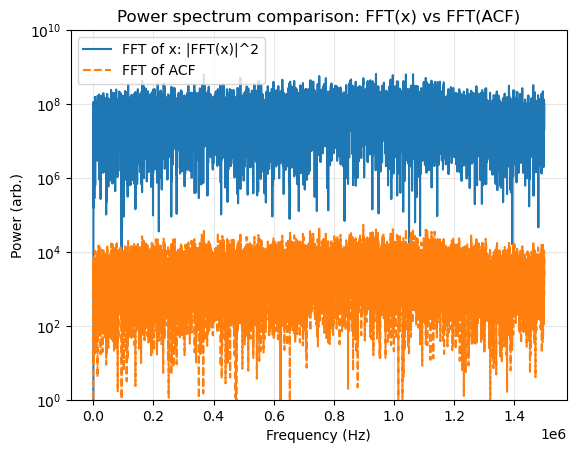

In [109]:
mask_fft = f_fft_s >= 0
mask_acf = f_acf_s >= 0

plt.figure()
plt.plot(f_fft_s[mask_fft], P_fft_s[mask_fft], label="FFT of x: |FFT(x)|^2")
plt.plot(f_acf_s[mask_acf], np.maximum(P_acf_s[mask_acf], 1e-30), "--", label="FFT of ACF")
plt.yscale('log')
plt.ylim(1,1e10)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (arb.)")
plt.title("Power spectrum comparison: FFT(x) vs FFT(ACF)")
plt.legend()
plt.grid(True, which="both", alpha=0.3)
plt.show()


Fig.5.8.4 The power spectrum derived from the calculated ACF for the 16000 sample block compared with the Fourier Transform 

In [110]:
def fwhm(x, y):
    y = np.asarray(y)
    half = 0.5*np.max(y)
    idx = np.where(y >= half)[0]
    if len(idx) < 2:
        return np.nan, None, half
    return x[idx[-1]] - x[idx[0]], idx, half

In [115]:
def fwhm_num(x, y):
    y = np.asarray(y)
    half = 0.5 * np.max(y)
    idx = np.where(y >= half)[0]
    if len(idx) < 2:
        return np.nan
    return x[idx[-1]] - x[idx[0]]

# --- ACF FWHM (seconds), using a window around lag=0 peak ---
i0 = np.argmax(ac)
W = 2000  # adjust if needed (choose a window around the peak)
sl = slice(i0 - W, i0 + W + 1)

acf_fwhm_sec = fwhm_num(lags[sl], ac[sl])

# --- Spectrum FWHM (Hz), using a local window around the main peak ---
m = f_fft_s >= 0
fpos = f_fft_s[m]
Ppos = P_fft_s[m]

peak = np.argmax(Ppos)
R = 2000  # adjust if needed
j0 = max(0, peak - R)
j1 = min(len(fpos), peak + R)

spec_fwhm_hz = fwhm_num(fpos[j0:j1], Ppos[j0:j1])

print("ACF FWHM (s):", acf_fwhm_sec)
print("Spectrum FWHM (Hz):", spec_fwhm_hz)

ACF FWHM (s): nan
Spectrum FWHM (Hz): 566624.9999999999


The FWHM of the ACF is measured as the lag width around zero lag where the ACF remains above half its maximum, giving a characteristic correlation time. The spectrum FWHM is measured as the frequency width around the dominant peak above half maximum; narrower ACF in time corresponds qualitatively to broader spectra in frequency because they are Fourier pairs.